In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from sklearn.metrics import log_loss


In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self, x):
    return(np.dot(x,self.w.T)+self.b)
  def sigmoid(self, x):
    return (1/(1+np.exp(-x)))
  def grad_w_mse(self, x, y):
    yp=self.sigmoid(self.perceptron(x))
    return (yp-y)*yp*(1-yp)*x
  def grad_w_ce(self, x, y):
    yp=self.sigmoid(self.perceptron(x))
    if(y==0):
      return yp*x
    elif(y==1):
      return (yp-1)*x
    else:
      return "Y SHOULD BE A BINARY CLASSIFICATION"
  def grad_b_mse(self, x, y):
    yp=self.sigmoid(self.perceptron(x))
    return (yp-y)*yp*(1-yp)
  def grad_b_ce(self, x, y):
    yp=self.sigmoid(self.perceptron(x))
    if(y==0):
      return yp
    elif(y==1):
      return (yp-1)
    else:
      return "Y SHOULD BE A BINARY CLASSIFICATION"
  def predict(self, X):
    y_p=[]
    for x in X:
      y_p.append(self.sigmoid(self.perceptron(x)))
    return np.array(y_p)
  def fit(self, X, Y, epochs=1, lr=1, first=True, loss=True, plot=True):
    # loss=True means CE loss e. False Means MSE loss
    # 
    if(first):
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    if(plot):
      loss_val=[]
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit='EPOCH'):
      db=0
      dw=0
      for x,y in zip(X,Y):
        if(loss):
          dw+=self.grad_w_ce(x,y)
          db+=self.grad_b_ce(x,y)
        else:
          dw+=self.grad_w_mse(x,y)
          db+=self.grad_b_mse(x,y)
      m=X.shape[1]
      self.w-=lr*dw/m
      self.b-=lr*db/m
      if(plot):
        y_p=self.predict(X)
        if(loss):
          losscalc= log_loss(y_p,Y)
        else:
          losscalc= mean_squared_error(y_p, Y)
        loss_val.append(losscalc)
    if(plot):
      plt.plot(loss_val)
      plt.xlabel("EPOCHS")
      plt.ylabel("ERROR")
      plt.show()

# class SigmoidNeuron:
  
#   def __init__(self):
#     self.w = None
#     self.b = None
    
#   def perceptron(self, x):
#     return np.dot(x, self.w.T) + self.b
  
#   def sigmoid(self, x):
#     return 1.0/(1.0 + np.exp(-x))
  
#   def grad_w_mse(self, x, y):
#     y_pred = self.sigmoid(self.perceptron(x))
#     return (y_pred - y) * y_pred * (1 - y_pred) * x
  
#   def grad_b_mse(self, x, y):
#       y_pred = self.sigmoid(self.perceptron(x))
#       return (y_pred - y) * y_pred * (1 - y_pred)
    
#   def grad_w_ce(self, x, y):
#     y_pred = self.sigmoid(self.perceptron(x))
#     if(y==1):
#       return (y_pred-1)*x
#     elif(y==0):
#       return y_pred*x
#     else:
#       raise ValueError("Y is supposed to be only 1 or 0")
#   def grad_b_ce(self, x, y):
#     y_pred = self.sigmoid(self.perceptron(x))
#     if(y==1):
#       return (y_pred-1)
#     elif(y==0):
#       return y_pred
#     else:
#       raise ValueError("Y is supposed to be only 1 or 0")
    
#   def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True,lossfunc='MSE', display_loss=False):
    
#     # initialise w, b
#     if initialise:
#       self.w = np.random.randn(1, X.shape[1])
#       self.b = 0
      
#     if display_loss:
#       loss = []
    
#     for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
#       dw = 0
#       db = 0
#       for x, y in zip(X, Y):
#         if(lossfunc=="MSE"):
#           dw += self.grad_w_mse(x, y)
#           db += self.grad_b_mse(x, y)
#         if(lossfunc=="CE"):
#           dw += self.grad_w_ce(x, y)
#           db += self.grad_b_ce(x, y)
#       m=X.shape[1]
#       self.w -= learning_rate * dw/m
#       self.b -= learning_rate * db/m
      
#       if display_loss:
#         Y_pred = self.sigmoid(self.perceptron(X))
#         if(lossfunc=="MSE"):
#           loss.append(mean_squared_error(Y_pred, Y))
#         if(lossfunc=="CE"):
#           loss.append(log_loss(Y_pred, Y))
#     if display_loss:
#       plt.plot(loss)
#       plt.xlabel('Epochs')
#       if(lossfunc=="MSE"):
#         plt.ylabel("MEAN SQUARE ERROR")
#       if(lossfunc=="CE"):
#         plt.ylabel("CROSS ENTROPY ERROR")
#       plt.show()
      
#   def predict(self, X):
#     Y_pred = []
#     for x in X:
#       y_pred = self.sigmoid(self.perceptron(x))
#       Y_pred.append(y_pred)
#     return np.array(Y_pred)

In [0]:
data, labels=make_blobs( n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


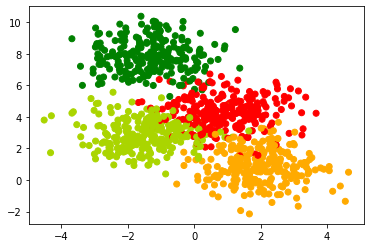

In [0]:
my_map=matplotlib.colors.LinearSegmentedColormap.from_list("",['red', 'yellow', 'green'])
plt.scatter(data[:,0],data[:,1], c=labels, cmap=my_map)

In [0]:
labels_bin=np.mod(labels,2)

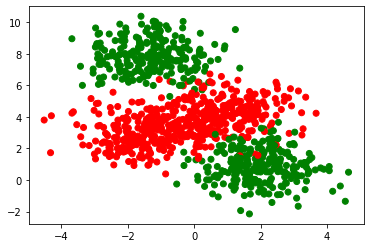

In [0]:
plt.scatter(data[:,0],data[:,1], c=labels_bin, cmap=my_map)

In [0]:
x_train, x_test, y_train, y_test= TTS(data, labels_bin, stratify=labels_bin, random_state=0)

In [0]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(750, 2) (250, 2) (750,) (250,)


In [0]:
sn=SigmoidNeuron()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


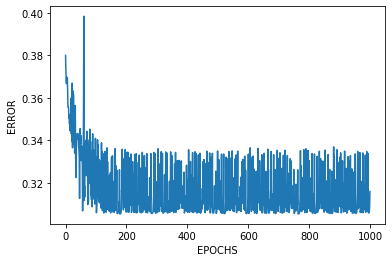

In [0]:

sn.fit(x_train, y_train, epochs=1000, lr=0.4, loss=False,plot=True)

In [0]:
y_p_train=sn.predict(x_train)
y_p_train_bin=(y_p_train>=.5).astype(np.int).ravel()
y_p_test=sn.predict(x_test)
y_p_test_bin=(y_p_test>=.5).astype(np.int).ravel()
acuTrain=accuracy_score(y_p_train_bin,y_train)
acuTest=accuracy_score(y_p_test_bin,y_test)
print("Train:{} Test:{}".format(acuTrain, acuTest))

Train:0.6693333333333333 Test:0.656


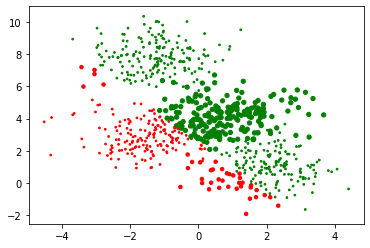

In [0]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_p_train_bin,s=15*(np.abs(0.2+ (y_p_train_bin-y_train))), cmap=my_map)

# MAKING OUR FIRST DNN USING SIGMOID

In [0]:
class FFN:
  def __init__(self):
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.w3=np.random.randn()
    self.w4=np.random.randn()
    self.w5=np.random.randn()
    self.w6=np.random.randn()
    self.b1=0
    self.b2=0
    self.b3=0
  def sigmoid(self, x):
    return (1/(1+np.exp(-x)))
  def feedforward(self,x):
    self.x1,self.x2=x
    self.a1=self.w1*self.x1+self.w2*self.x2+self.b1
    self.h1=self.sigmoid(self.a1)
    self.a2=self.w3*self.x1+self.w4*self.x2+self.b2
    self.h2=self.sigmoid(self.a2)
    self.a3=self.w5*self.h1+self.w6*self.h2+self.b3
    self.h3=self.sigmoid(self.a3)
    return self.h3
  def grad(self,x,y):
    self.feedforward(x)
    self.dw5=(self.h3-y)*self.h3*(1-self.h3)*self.h1
    self.dw6=(self.h3-y)*self.h3*(1-self.h3)*self.h2
    self.db3=(self.h3-y)*self.h3*(1-self.h3)
    
    self.dw1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x1
    self.dw2=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x2 
    self.db1=(self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)

    self.dw3=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x1
    self.dw4=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x2 
    self.db2=(self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)

  def predict(self, X):
    y_p=[]
    for x in X:
      y_p.append(self.feedforward(x))
    return np.array(y_p)
  def fit(self, X, Y, epochs=1, lr=1, initialize=True, display_loss=True):
    if(initialize):
      self.w1=np.random.randn()
      self.w2=np.random.randn()
      self.w3=np.random.randn()
      self.w4=np.random.randn()
      self.w5=np.random.randn()
      self.w6=np.random.randn()
      self.b1=0
      self.b2=0
      self.b3=0
    if(display_loss):
      loss=[]
    for epoch in tqdm_notebook(range(epochs), total=epochs, unit="EPOCH"):
      ddw1,ddw2,ddw3,ddw4,ddw5,ddw6,ddb1,ddb2,ddb3=[0]*9
      for x,y in zip(X,Y):
        self.grad(x,y)
        ddw1+=self.dw1
        ddw2+=self.dw2
        ddw3+=self.dw3
        ddw4+=self.dw4
        ddw5+=self.dw5
        ddw6+=self.dw6
        ddb1+=self.db1
        ddb2+=self.db2
        ddb3+=self.db3
      m=X.shape[1]
      self.w1-=lr*ddw1/m
      self.w2-=lr*ddw2/m
      self.w3-=lr*ddw3/m
      self.w4-=lr*ddw4/m
      self.w5-=lr*ddw5/m
      self.w6-=lr*ddw6/m
      self.b1-=lr*ddb1/m
      self.b2-=lr*ddb2/m
      self.b3-=lr*ddb3/m

      if(display_loss):
        y_p=self.predict(X)
        loss.append(mean_squared_error(y_p,Y))
    if(display_loss):
      plt.plot(loss)
      plt.xlabel("EPOCHS")
      plt.ylabel("MEAN SQURED ERROR")
      plt.show()
          




In [0]:
ffn=FFN()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


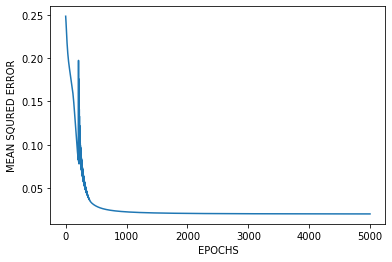

In [0]:
ffn.fit(x_train,y_train, epochs=5000, lr=0.01)

In [0]:
yp_train_ffn=ffn.predict(x_train)
yp_test_ffn=ffn.predict(x_test)
yp_train_ffn_bin=(yp_train_ffn>=0.5).astype(np.int).ravel()
yp_test_ffn_bin=(yp_test_ffn>=0.5).astype(np.int).ravel()
accuracy_train=accuracy_score(yp_train_ffn_bin, y_train)
accuracy_test=accuracy_score(yp_test_ffn_bin,y_test)
print("Taining accuracy : {} \n Test accuracy : {}".format(accuracy_train, accuracy_test))

Taining accuracy : 0.976 
 Test accuracy : 0.94


# GENERIC FFN CLASS

In [0]:
# class GenFFN:
#   def __init__(self, inputs, hidden_sizes=[2]):
#     self.nx=inputs
#     self.nh=len(hidden_sizes)
#     self.ny=1
#     self.sizes=[self.nx]+hidden_sizes+[self.ny]
#     self.W={}
#     self.B={}
#     for i in range(self.nh+1):
#       self.W[i+1]=np.random.randn(self.sizes[i], self.sizes[i+1])
#       self.B[i+1]=np.zeros((1,self.sizes[i+1]))
#   def sigmoid(self, x):
#     return(1.0/(1+np.exp(-x)))
#   def forwardPass(self, x):
#     self.A={}
#     self.H={}
#     self.H[0]=x.reshape(1,-1)
#     for i in range(self.nh+1):
#       self.A[i+1]=np.matmul(self.H[i], self.W[i+1])+self.B[i+1]
#       self.H[i+1]=self.sigmoid(self.A[i+1])
#     return self.H[self.nh+1]
#   def grad_sigmoid(self, x):
#     return x*(1-x)
#   def grad(self, x, y):
#     self.forwardPass(x)
#     self.dW = {}
#     self.dB = {}
#     self.dH = {}
#     self.dA = {}
#     L = self.nh + 1
#     self.dA[L] = (self.H[L] - y)
#     for k in range(L, 0, -1):
#       self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
#       self.dB[k] = self.dA[k]
#       self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
#       self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
#   def fit(self, X, Y, epochs=1, initialize=True,learning_rate=1, display_loss=False):
#     if(initialize):
#       for i in range(self.nh+1):
#         self.W[i+1]=np.random.randn(self.sizes[i], self.sizes[i+1])
#         self.B[i+1]=np.zeros((1,self.sizes[i+1]))
#     if(display_loss):
#       loss={}
#     for epoch in tqdm_notebook(range(epochs), total=epochs, unit="EPOCHS"):
#       dw={}
#       db={}
#       for i in range(self.nh+1):
#         dw[i+1]=np.zeros((self.sizes[i], self.sizes[i+1]))
#         db[i+1]=np.zeros((1,self.sizes[i+1]))
#       for x,y in zip(X,Y):
#         self.grad(x,y)
#         for i in range(self.nh+1):
#           db[i+1]+=self.dB[i+1]
#           dw[i+1]+=self.dW[i+1]
#       m=X.shape[1]
#       for i in range(self.nh+1):
#         self.W[i+1]-=learning_rate*dw[i+1]/m
#         self.B[i+1]-=learning_rate*db[i+1]/m
#       if(display_loss):
#         Y_pred=self.predict(X)
#         loss[epoch]=mean_squared_error(Y_pred,Y)
#     if(display_loss):
#       plt.plot(list(loss.values()))
#       plt.xlabel("EPOCH")
#       plt.ylabel("MEAN_SQ_ERROR")
#   def predict(self, X):
#     y_p=[]
#     for x in X:
#       y_p.append(self.forwardPass(x))
#     return np.array(y_p).squeeze()

In [0]:
class GenFFN:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
   
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


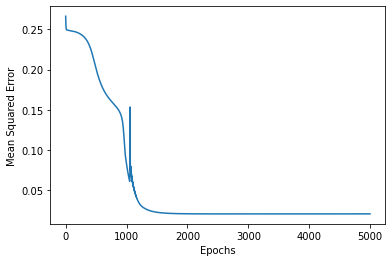

In [0]:
ffsm=GenFFN(2,[2,1])
ffsm.fit(x_train, y_train, epochs=5000, learning_rate=0.001, display_loss=True)

In [0]:
yp_train_ffsm=ffsm.predict(x_train)
yp_test_ffsm=ffsm.predict(x_test)
yp_train_ffsm_bin=(yp_train_ffsm>=0.5).astype(np.int).ravel()
yp_test_ffsm_bin=(yp_test_ffsm>=0.5).astype(np.int).ravel()
accuracy_train=accuracy_score(yp_train_ffsm_bin, y_train)
accuracy_test=accuracy_score(yp_test_ffsm_bin,y_test)
print("Taining accuracy : {} \n Test accuracy : {}".format(accuracy_train, accuracy_test))

Taining accuracy : 0.9746666666666667 
 Test accuracy : 0.94


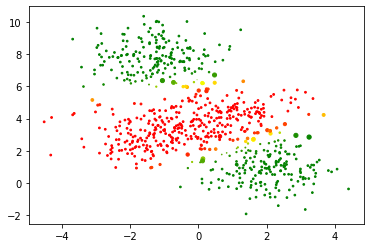

In [0]:
plt.scatter(x_train[:,0],x_train[:,1], c=yp_train_ffsm,s=15*(np.abs(0.2+ (yp_train_ffsm-y_train))), cmap=my_map)

# Multi Class Classifiction



In [0]:
x_train, x_test, y_train, y_test= TTS(data, labels, stratify=labels, random_state=0)

In [0]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(y_train)

(750, 2) (750,) (250, 2) (250,)
[0 3 3 2 2 0 3 2 0 1 0 3 1 3 1 2 1 0 2 2 2 1 0 2 2 2 0 3 2 1 3 2 3 2 1 2 0
 1 2 2 3 2 1 1 0 3 2 3 3 0 0 2 2 0 0 0 2 3 0 1 0 0 0 1 2 1 0 1 1 0 0 1 0 2
 1 3 2 3 3 2 1 3 2 2 2 3 3 2 2 1 0 1 3 0 1 1 1 2 3 0 1 3 3 0 2 0 0 1 1 1 3
 0 2 2 1 1 1 2 2 3 1 3 0 0 1 3 0 3 1 3 2 2 0 1 3 3 3 0 2 3 2 3 3 0 0 2 0 0
 3 0 3 0 0 3 0 2 0 3 1 0 0 2 0 0 1 3 3 0 0 3 0 3 0 1 2 2 0 1 0 3 2 0 1 1 1
 1 2 1 1 0 0 1 0 2 3 2 3 0 1 3 1 2 1 0 0 3 0 3 3 0 1 3 2 1 3 2 1 3 2 1 1 0
 1 2 3 0 2 2 0 0 0 1 2 0 3 3 1 0 1 2 3 2 2 2 2 3 0 2 1 2 0 2 1 0 3 2 3 3 2
 0 0 3 2 3 2 1 1 0 3 3 1 0 0 3 1 0 2 0 1 3 1 1 1 1 2 1 0 0 1 1 1 2 3 0 0 2
 2 2 0 1 1 3 1 0 3 2 2 2 0 1 2 3 1 0 2 0 1 0 2 2 2 2 1 0 3 3 1 2 1 3 0 1 1
 1 2 0 3 0 0 0 3 1 0 1 1 1 3 2 3 2 2 3 2 1 0 2 3 1 1 3 3 1 2 1 2 3 3 2 0 1
 1 3 2 2 3 1 3 3 1 0 2 2 3 2 2 0 0 0 0 2 3 0 2 3 0 0 2 0 2 0 3 1 3 3 0 2 3
 3 1 1 1 3 2 1 0 3 1 2 1 2 1 0 0 3 3 3 1 1 0 1 1 1 1 3 0 2 2 0 1 1 1 3 0 2
 2 3 1 2 2 2 1 0 3 0 2 2 3 2 2 3 1 3 2 0 2 2 0 2 2 2 1 2 0 1 1 2 0 2

In [0]:
enc=OneHotEncoder()

In [0]:
y_train_oh=enc.fit_transform(np.expand_dims(y_train, 1)).toarray()
y_test_oh=enc.fit_transform(np.expand_dims(y_test, 1)).toarray()
print(y_train_oh.shape, y_test_oh.shape)


(750, 4) (250, 4)


In [37]:
print(y_train_oh)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
